In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
%matplotlib inline

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
np.__version__, pm.__version__

('1.24.3', '5.5.0')

In [3]:
#generate data
np.random.seed(123)
x = np.linspace(0, 1, 100)
y = 2 * x + np.random.randn(100)

In [8]:
# define pymc model
with pm.Model() as model:
    # define priors
    alpha = pm.Normal('alpha', mu=0, sigma=20)
    beta = pm.Normal('beta', mu=0, sigma=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # define likelihood
    y_obs = pm.Normal('Y_obs', mu=alpha + beta * x, sigma=sigma, observed=y)
    
    # inference
    idata = pm.sample(2000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 17 seconds.


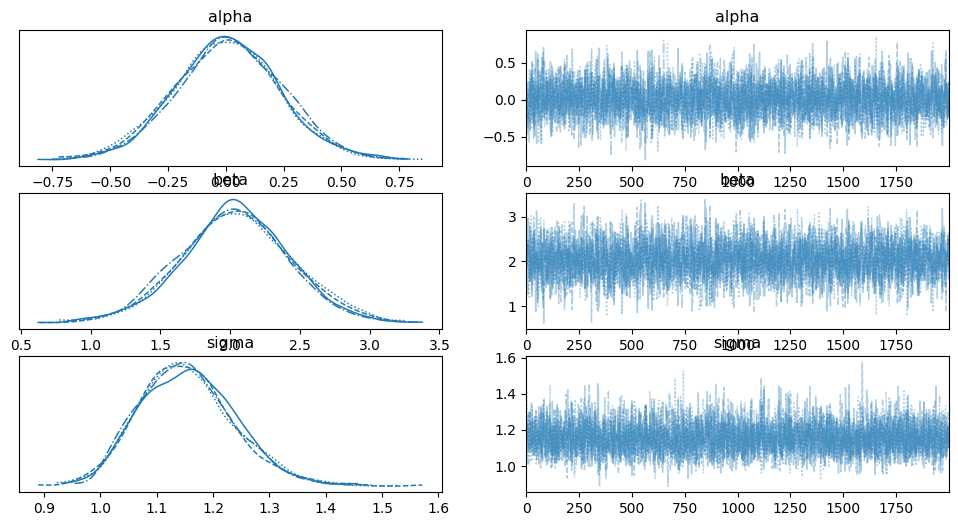

In [9]:
import arviz as az
az.plot_trace(idata);


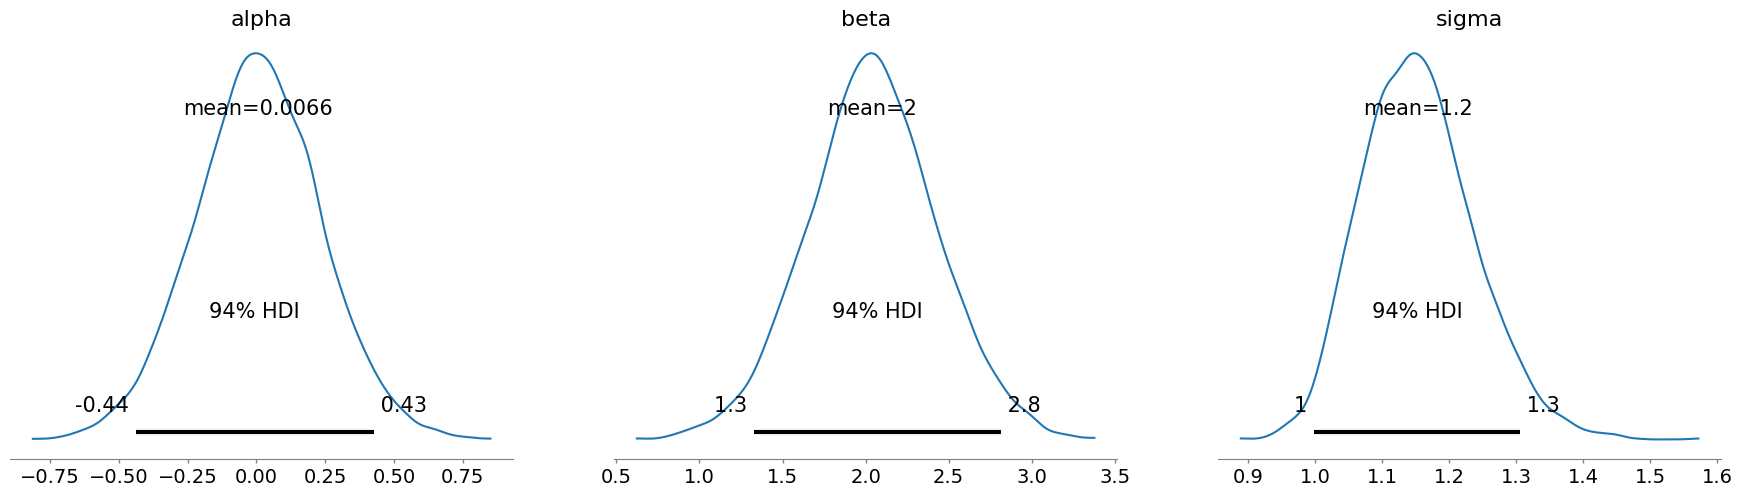

In [12]:
pm.plot_posterior(idata, var_names=['alpha', 'beta', 'sigma']);

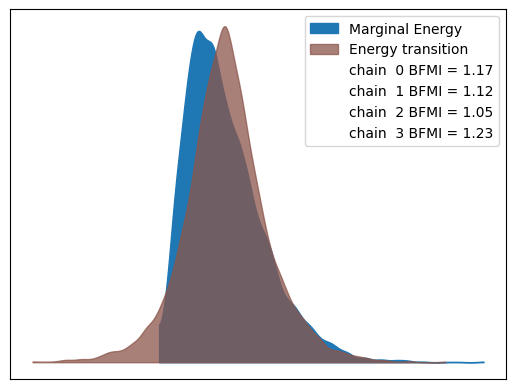

In [13]:
az.plot_energy(idata);

In [24]:
ppc = pm.sample_posterior_predictive(idata,model=model)

Sampling: [Y_obs]


KeyError: 'Y_obs'

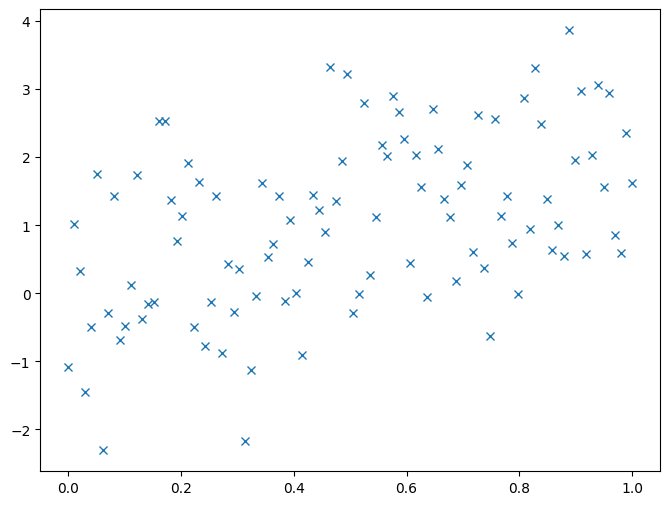

In [25]:
# plot posterior predictive
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'x', label='data')
ax.plot(x, ppc['Y_obs'].mean(axis=0), label='posterior predictive mean')
ax.plot(x, ppc['Y_obs'][::100].T, 'C0-', alpha=0.1)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y');


KeyError: 'Y_obs'

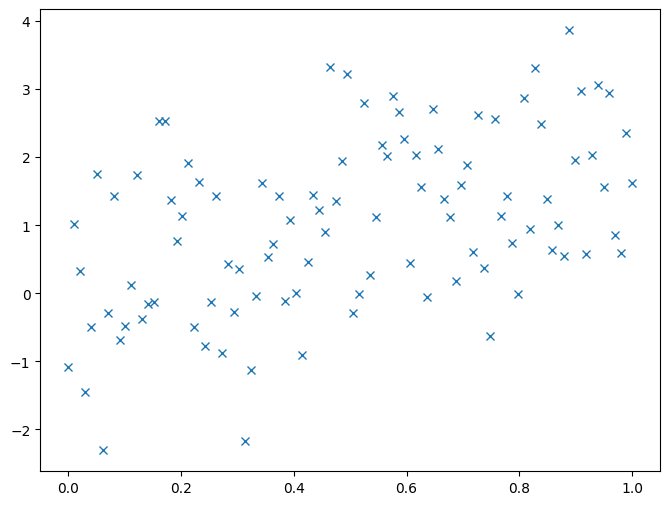

In [27]:
#plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'x', label='data')
ax.plot(x, ppc['Y_obs'].mean(axis=0), label='MAP regression line')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend();
plt.show()